# Car Prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import requests
plt.style.use('ggplot')
%matplotlib inline

In [2]:
url = (
    'http://archive.ics.uci.edu/ml/machine-learning-databases/'
    'autos/imports-85.data'
)

header = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price',

]

In [3]:
df = pd.read_csv(url, names=header, na_values='?') 

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


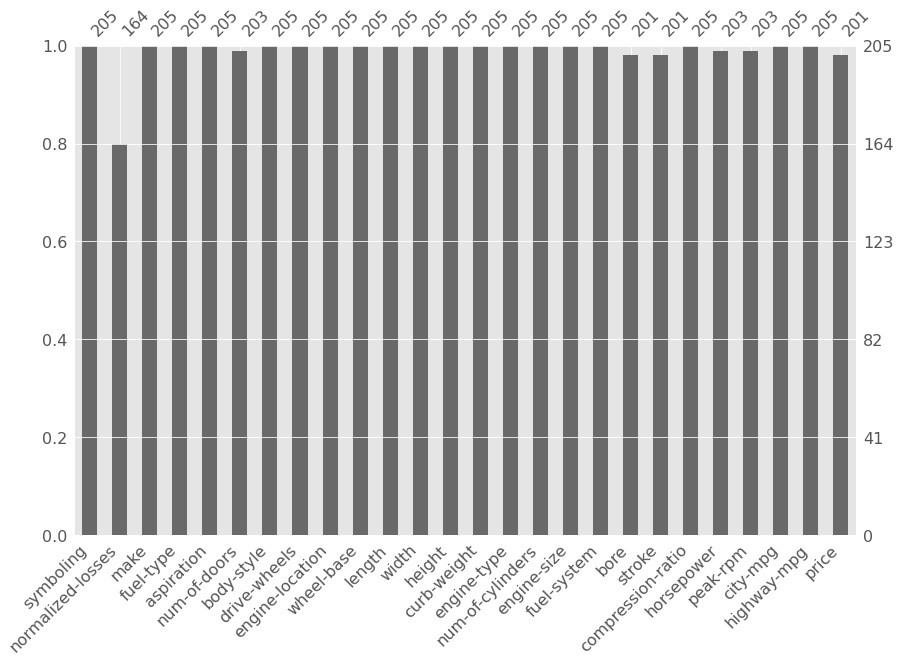

In [5]:
msno.bar(df, figsize=(14,9))

In [6]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
cols_with_msno = df.isna().sum()
mask = cols_with_msno > 0
cols_with_msno[mask]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [9]:
df = df[~df['price'].isnull()]

In [10]:
df.drop(labels=['normalized-losses'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [12]:
pd.set_option('display.max_columns', 25)

In [13]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [14]:
features = {
    'categorical': [
        'make', 'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels', 'engine-location', 
        'engine-type', 'num-of-cylinders', 'fuel-system',
        
    ],
    'numerical': [
        'symboling', 'wheel-base', 'length', 'width', 'height', 
        'curb-weight', 'engine-size', 'bore', 'stroke', 
        'compression-ratio', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 
    ],
}

features['all'] = features['categorical'] + features['numerical']

target = 'price'

In [15]:
features

{'all': ['make',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'body-style',
  'drive-wheels',
  'engine-location',
  'engine-type',
  'num-of-cylinders',
  'fuel-system',
  'symboling',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg'],
 'categorical': ['make',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'body-style',
  'drive-wheels',
  'engine-location',
  'engine-type',
  'num-of-cylinders',
  'fuel-system'],
 'numerical': ['symboling',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg']}

In [16]:
df[target].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [17]:
df[target] = df[target].astype(np.float64) / 1000
df[target].head()

0    13.495
1    16.500
2    16.500
3    13.950
4    17.450
Name: price, dtype: float64

In [18]:
df[features['categorical']].sample(n=3, random_state=42)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
98,nissan,gas,std,two,hardtop,fwd,front,ohc,four,2bbl
16,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi
31,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl


In [19]:
df[features['numerical']].sample(n=3, random_state=42)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
98,2,95.1,162.4,63.8,53.3,2008,97,3.15,3.29,9.4,69.0,5200.0,31,37
16,0,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,182.0,5400.0,16,22
31,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76.0,6000.0,31,38


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df[features['all']],
    df[target],
    test_size=.25,
    random_state=0,
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((150, 24), (150,), (51, 24), (51,))

In [21]:
y_train.describe()

count    150.000000
mean      12.555907
std        7.258394
min        5.151000
25%        7.609000
50%        9.970000
75%       15.994750
max       41.315000
Name: price, dtype: float64

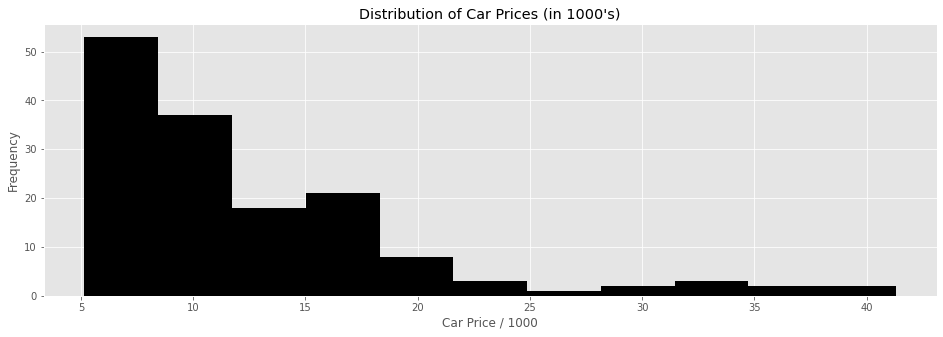

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

y_train.plot(
    title="Distribution of Car Prices (in 1000's)",
    kind='hist', 
    bins=11,
    color='k',
    ax=ax
)

ax.set_xlabel('Car Price / 1000')

fig.show()

In [23]:
df[features['all']].isna().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
engine-type          0
num-of-cylinders     0
fuel-system          0
symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
dtype: int64

In [24]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='most_frequent')
# x_train[x_train.columns] = imputer.fit_transform(x_train[x_train.columns])
# x_test[x_test.columns] = imputer.transform(x_test[x_test.columns])

# x_test.head()

In [25]:
x_test.isna().sum().sum()

4

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnNamesKeeper(TransformerMixin, BaseEstimator):
    
    def __init__(self, transformer):
        self._columns = None
        self.transformer = transformer
        
    def __repr__(self):
        return repr(self.transformer)
    
    def fit(self, x, y=None):
        self._columns = x.columns
        self.transformer.fit(x)
    
    def transform(self, x, y=None):
        x = self.transformer.transform(x)
        return pd.DataFrame(x, columns=self._columns)
        
    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x)

In [27]:
from sklearn.impute import SimpleImputer

imputer = ColumnNamesKeeper(SimpleImputer(strategy='most_frequent'))
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

x_test.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,chevrolet,gas,std,two,hatchback,fwd,front,ohc,four,2bbl,1,94.5,155.9,63.6,52.0,1874,90,3.03,3.11,9.6,70.0,5400.0,38,43
1,toyota,diesel,turbo,four,sedan,fwd,front,ohc,four,idi,-1,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,73.0,4500.0,30,33
2,peugot,diesel,turbo,four,wagon,rwd,front,l,four,idi,0,114.2,198.9,68.4,58.7,3430,152,3.7,3.52,21.0,95.0,4150.0,25,25
3,nissan,gas,std,four,sedan,fwd,front,ohcv,six,mpfi,0,100.4,181.7,66.5,55.1,3095,181,3.43,3.27,9.0,152.0,5200.0,17,22
4,toyota,gas,std,four,wagon,rwd,front,dohc,six,mpfi,-1,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,9.2,156.0,5200.0,19,24


In [28]:
x_test.isna().sum().sum()

0

In [29]:
!pip install category_encoders --quiet

     |████████████████████████████████| 86 kB 2.6 MB/s 


In [30]:
from category_encoders.ordinal import OrdinalEncoder

encoder = OrdinalEncoder(cols=features['categorical'], handle_unknown='value')

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

x_train.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,1,1,1,1,1,1,1,1,1,3,89.5,168.9,65.0,51.6,2756,194,3.74,2.9,9.5,207.0,5900.0,17,25
1,2,1,1,2,2,2,2,2,2,1,2,97.3,171.7,65.5,55.7,2300,109,3.19,3.4,10.0,100.0,5500.0,26,32
2,3,1,1,2,2,2,2,2,2,2,0,97.2,173.4,65.2,54.7,2302,120,3.33,3.47,8.5,97.0,5200.0,27,34
3,4,1,1,2,3,2,2,2,2,2,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,62.0,4800.0,31,37
4,5,1,1,2,2,2,2,2,2,2,1,93.7,157.3,63.8,50.6,1989,90,2.97,3.23,9.4,68.0,5500.0,31,38


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

rgr = RandomForestRegressor(n_jobs=-1)
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)

In [32]:
print(rgr)

RandomForestRegressor(n_jobs=-1)


In [34]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}, RMSE: {:.2f}'.format(
        r2_score(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred),
        np.sqrt(mean_squared_error(y_test, y_pred)),
    )
)

R2: 0.92, MSE: 6.89, MAE: 1.72, RMSE: 2.63
